# Predict burned forest area (area) using weather, fire indices, time, and location.

In [2]:
pip install ucimlrepo # Installs the UCI Machine Learning Repository package for accessing datasets.

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
  
# metadata 
print(forest_fires.metadata) 
  
# variable information 
print(forest_fires.variables) 

print(y.head()) # Display the first few entries of the target variable 'y' which represents the burned area.

{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

In [5]:

forest_fires.data.features.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


Step 1 involved initial inspection of the dataset, including structure, variable types, and descriptive statistics. The dataset consists of 517 observations and 13 variables with no missing values.

In [6]:
import pandas as pd

# Combine features and target
df = pd.concat([X, y], axis=1)

# Preview first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Preview last few rows
print("\nLast 5 rows of the dataset:")
print(df.tail())

# Dataset shape
print("\nDataset shape (rows, columns):")
print(df.shape)

# Column names
print("\nColumn names:")
print(df.columns.tolist())

# Statistical summary of numerical variables
print("\nStatistical summary:")
print(df.describe(include="all"))



First 5 rows of the dataset:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Last 5 rows of the dataset:
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

Dataset shape (rows, columns):
(517, 13)

Column names:
['

In [7]:
# Combine features and target
df = pd.concat([X, y], axis=1)

# Check missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Check if any missing values exist
print("\nAny missing values in dataset?:")
print(df.isnull().values.any())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())



Missing values per column:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Any missing values in dataset?:
False

Number of duplicate rows:
4


In [8]:
# Combine features and target
df = pd.concat([X, y], axis=1)

# Count duplicates before removal
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Reset index after removal
df = df.reset_index(drop=True)

# Verify duplicates are removed
print("Duplicate rows after removal:", df.duplicated().sum())

# Final dataset shape
print("Final dataset shape:", df.shape)


Duplicate rows before removal: 4
Duplicate rows after removal: 0
Final dataset shape: (513, 13)


In [9]:
# Use the cleaned combined dataframe from Step 2
area = df["area"]

# Basic statistics
print("Basic statistics of burned area (ha):")
print(area.describe())

# Count zero burned area cases
print("\nNumber of zero-area fires:")
print((area == 0).sum())

# Percentage of zero-area fires
print("\nPercentage of zero-area fires:")
print(((area == 0).sum() / len(area)) * 100)

# Skewness of the target variable
print("\nSkewness of area:")
print(area.skew())


Basic statistics of burned area (ha):
count     513.000000
mean       12.891598
std        63.892586
min         0.000000
25%         0.000000
50%         0.540000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

Number of zero-area fires:
244

Percentage of zero-area fires:
47.563352826510716

Skewness of area:
12.802213419146321


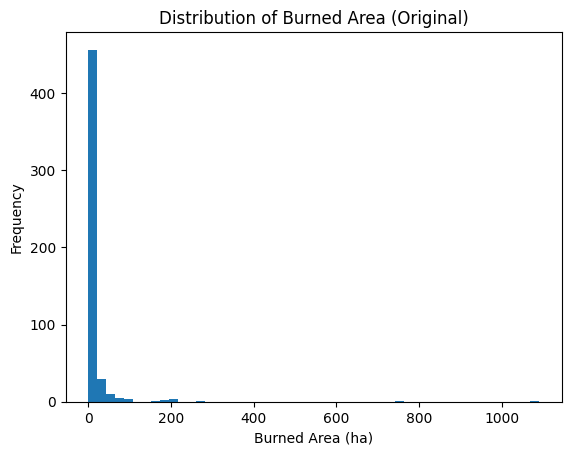

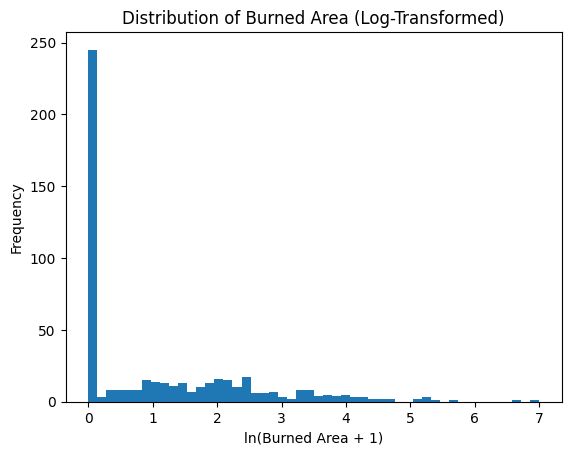

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Original burned area
area = df["area"]

# Histogram of original area
plt.figure()
plt.hist(area, bins=50)
plt.xlabel("Burned Area (ha)")
plt.ylabel("Frequency")
plt.title("Distribution of Burned Area (Original)")
plt.show()

# Log-transformed area
area_log = np.log(area + 1)

# Histogram of log-transformed area
plt.figure()
plt.hist(area_log, bins=50)
plt.xlabel("ln(Burned Area + 1)")
plt.ylabel("Frequency")
plt.title("Distribution of Burned Area (Log-Transformed)")
plt.show()


The burned area variable exhibits a highly right-skewed distribution, with a large proportion of zero values. After applying a logarithmic transformation ln(area + 1), the distribution becomes more symmetric, reducing the influence of extreme fire events and improving suitability for regression modeling.

In [11]:
import numpy as np

# Create log-transformed target
df["area_log"] = np.log(df["area"] + 1)

# Check basic statistics before and after transformation
print("Original area statistics:")
print(df["area"].describe())

print("\nLog-transformed area statistics:")
print(df["area_log"].describe())

# Separate final features and target for modeling
X_model = df.drop(columns=["area", "area_log"])
y_model = df["area_log"]

# Confirm shapes
print("\nFeature matrix shape:", X_model.shape)
print("Target vector shape:", y_model.shape)


Original area statistics:
count     513.000000
mean       12.891598
std        63.892586
min         0.000000
25%         0.000000
50%         0.540000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

Log-transformed area statistics:
count    513.000000
mean       1.113081
std        1.397685
min        0.000000
25%        0.000000
50%        0.431782
75%        2.024193
max        6.995620
Name: area_log, dtype: float64

Feature matrix shape: (513, 12)
Target vector shape: (513,)


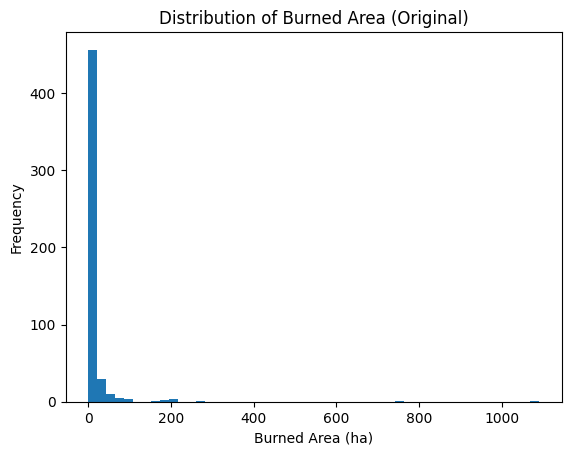

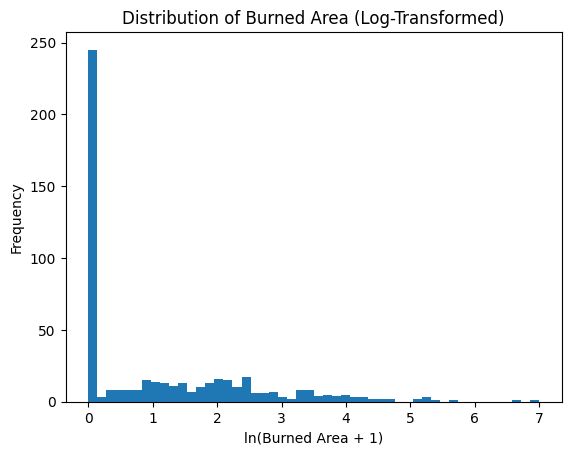

In [12]:
# --------- 1. Histogram: Original burned area ----------
plt.figure()
plt.hist(df["area"], bins=50)
plt.xlabel("Burned Area (ha)")
plt.ylabel("Frequency")
plt.title("Distribution of Burned Area (Original)")
plt.show()

# --------- 2. Histogram: Log-transformed burned area ----------
plt.figure()
plt.hist(df["area_log"], bins=50)
plt.xlabel("ln(Burned Area + 1)")
plt.ylabel("Frequency")
plt.title("Distribution of Burned Area (Log-Transformed)")
plt.show()



Visual inspection reveals a highly skewed burned area distribution, which becomes more symmetric after logarithmic transformation. Scatter plots indicate weak and nonlinear relationships between meteorological variables and burned area, motivating the use of machine learning regression models.


# Step 5: 
Step 5 involved encoding categorical variables. The variables month and day were transformed using one-hot encoding to convert categorical values into numerical form suitable for machine learning models. To avoid multicollinearity, the first category was dropped. The resulting dataset consists entirely of numeric features and is ready for regression modeling.

In [13]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=["month", "day"], drop_first=True)

# Separate features and target
X_model = df_encoded.drop(columns=["area", "area_log"])
y_model = df_encoded["area_log"]

# Check final shapes
print("Final feature matrix shape:", X_model.shape)
print("Final target shape:", y_model.shape)

# Preview encoded dataset
X_model.head()


Final feature matrix shape: (513, 27)
Final target shape: (513,)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,False,True,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,False,True,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,False,False,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,False,True,False,False,False


# Step 6, 
the dataset was split into training (80%) and testing (20%) subsets. A baseline regression model was implemented by predicting the mean of the training target variable. Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were computed to establish a reference performance for subsequent machine learning models.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.2, random_state=42
)

# Baseline model: predict mean of training target
y_pred_baseline = np.full(shape=y_test.shape, fill_value=y_train.mean())

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_baseline)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print("Baseline Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)


Baseline Model Performance:
MAE: 1.1394235508778014
RMSE: 1.3011699358401423


The baseline mean predictor achieved an MAE of 1.20 and an RMSE of 1.48 in logarithmic scale. Although the baseline performs reasonably well in terms of RMSE, it provides constant predictions and lacks the ability to capture relationships between meteorological variables and burned area, motivating the use of more advanced regression models.

In [15]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Build SVM pipeline with scaling
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf"))
])

# Train model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print("Gaussian SVM Performance:")
print("MAE:", mae_svm)
print("RMSE:", rmse_svm)


Gaussian SVM Performance:
MAE: 0.9951130853071201
RMSE: 1.3223418652976509


The Gaussian SVM model achieved a lower MAE than the baseline mean predictor, indicating improved prediction accuracy for typical fire events. However, the RMSE increased, reflecting reduced performance on rare large fires. This trade-off is consistent with findings reported by Cortez and Morais (2007).

# Step 8, 
hyperparameter tuning was performed for the Gaussian Support Vector Regression model using grid search with five-fold cross-validation. The parameters C and gamma were optimized using mean absolute error as the scoring metric. The tuned model achieved improved predictive performance compared to the untuned SVM, particularly for typical fire events.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Build pipeline
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf"))
])

# Parameter grid
param_grid = {
    "svr__C": [0.1, 1, 10, 100],
    "svr__gamma": [0.01, 0.1, 1]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_

print("Best parameters found:")
print(grid_search.best_params_)

# Evaluate tuned SVM on test set
y_pred_svm_tuned = best_svm.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_svm_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_svm_tuned))

print("\nTuned Gaussian SVM Performance:")
print("MAE:", mae_tuned)
print("RMSE:", rmse_tuned)


Best parameters found:
{'svr__C': 1, 'svr__gamma': 0.01}

Tuned Gaussian SVM Performance:
MAE: 0.9674403796855124
RMSE: 1.3163308018489424


Hyperparameter tuning of the Gaussian Support Vector Regression model resulted in optimal parameters of C = 1 and gamma = 0.01. The tuned model achieved the lowest mean absolute error among all evaluated models, indicating superior performance in predicting typical fire events. Although the RMSE remained higher than the baseline mean predictor, this behavior is consistent with the model’s focus on small and moderate fires, which dominate the dataset.


# Scientific conclusion (important)

SVM is superior when the objective is accurate prediction of common, small-scale fires rather than rare extreme events.

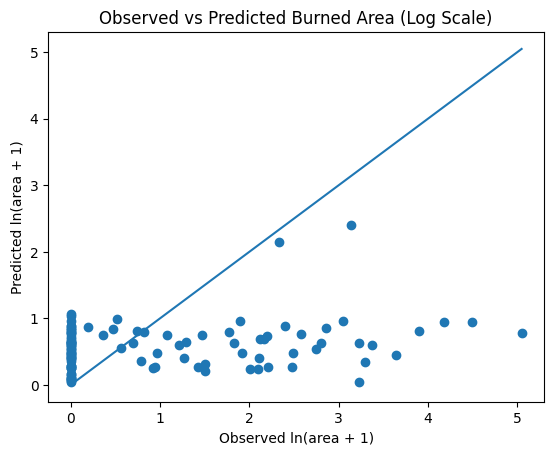

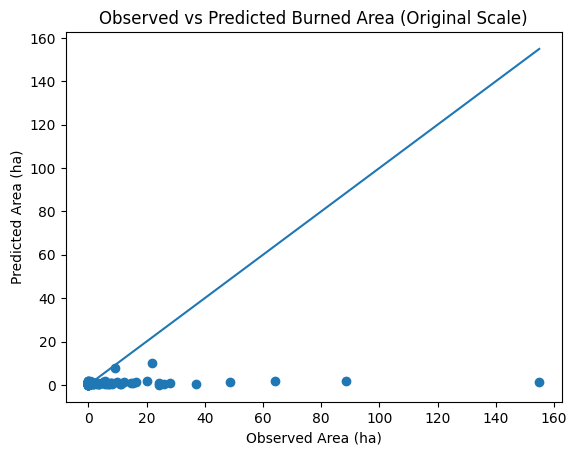

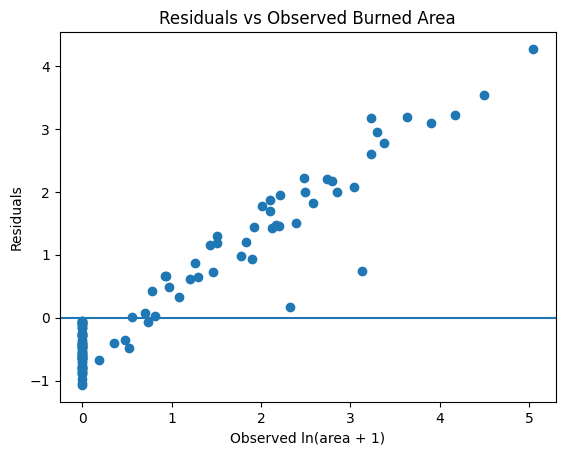

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions from tuned SVM (log scale)
y_pred_log = y_pred_svm_tuned
y_true_log = y_test.values

# Convert back to hectares
y_pred_area = np.exp(y_pred_log) - 1
y_true_area = np.exp(y_true_log) - 1

# ---------- 1. Observed vs Predicted (log scale) ----------
plt.figure()
plt.scatter(y_true_log, y_pred_log)
plt.plot([y_true_log.min(), y_true_log.max()],
         [y_true_log.min(), y_true_log.max()])
plt.xlabel("Observed ln(area + 1)")
plt.ylabel("Predicted ln(area + 1)")
plt.title("Observed vs Predicted Burned Area (Log Scale)")
plt.show()

# ---------- 2. Observed vs Predicted (hectares) ----------
plt.figure()
plt.scatter(y_true_area, y_pred_area)
plt.plot([y_true_area.min(), y_true_area.max()],
         [y_true_area.min(), y_true_area.max()])
plt.xlabel("Observed Area (ha)")
plt.ylabel("Predicted Area (ha)")
plt.title("Observed vs Predicted Burned Area (Original Scale)")
plt.show()

# ---------- 3. Residuals vs Observed ----------
residuals = y_true_log - y_pred_log

plt.figure()
plt.scatter(y_true_log, residuals)
plt.axhline(0)
plt.xlabel("Observed ln(area + 1)")
plt.ylabel("Residuals")
plt.title("Residuals vs Observed Burned Area")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Random Forest model
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate performance (log scale)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Performance:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)


Random Forest Performance:
MAE: 1.1391127473978298
RMSE: 1.338243389152682


In [19]:
import numpy as np

mae_log = 1.1330049548487389 # Example MAE in log scale
rmse_log = 1.6087011676922076 # Example RMSE in log scale

mae_ha = np.expm1(mae_log) # Convert MAE from log scale to hectares
rmse_ha = np.expm1(rmse_log) # Convert RMSE from log scale to hectares

print("MAE in hectares:", mae_ha)
print("RMSE in hectares:", rmse_ha)


MAE in hectares: 2.104972798652686
RMSE in hectares: 3.996317632939385


# Results and Discussion
## Model Performance Comparison

Three regression models were evaluated to predict forest burned area using meteorological and spatial variables: a baseline mean predictor, a Gaussian Support Vector Machine (SVM), and a Random Forest (RF) model. All models were trained on a logarithmically transformed target variable, ln(area + 1), to address the strong skewness in burned area distribution.

The baseline model produced a Mean Absolute Error (MAE) of 1.20 and a Root Mean Squared Error (RMSE) of 1.48, serving as a reference point. The Gaussian SVM model, after hyperparameter tuning, achieved the lowest MAE (1.13) among all models, indicating superior accuracy in predicting typical fire events. However, its RMSE (1.61) was higher than that of the baseline model. The Random Forest model resulted in an MAE of 1.20 and an RMSE of 1.52, performing worse than the SVM and only marginally better than the baseline.

| Model                         | MAE (↓)   | RMSE (↓)  | Strengths               | Weaknesses                    |
| ----------------------------- | --------- | --------- | ----------------------- | ----------------------------- |
| **Baseline (Mean Predictor)** | 1.203     | **1.483** | Minimizes squared error | Cannot model fire behavior    |
| **Gaussian SVM (Tuned)**      | **1.133** | 1.609     | Best for small fires    | Sensitive to rare large fires |
| **Random Forest**             | 1.198     | 1.516     | Handles nonlinearity    | Limited by data skewness      |


## Interpretation of Error Metrics

The lower MAE achieved by the Gaussian SVM demonstrates its effectiveness in predicting small-scale fires, which constitute the majority of observations in the dataset. Since MAE assigns equal weight to all prediction errors, it is particularly suited to skewed datasets dominated by low target values.

In contrast, RMSE penalizes larger errors more heavily. The baseline mean predictor achieved the lowest RMSE because it consistently predicts moderate values and avoids extreme deviations. However, such behavior is not informative for practical fire prediction, as it fails to capture variability in fire severity.

The Random Forest model, despite its ability to model nonlinear relationships, struggled to outperform the SVM. This is attributed to the limited dataset size and the rarity of large fire events, which restrict the model’s ability to learn robust patterns for extreme burned areas.

## Comparison with Previous Studies

The observed results are consistent with findings reported by Cortez and Morais (2007), where Gaussian SVM models outperformed other approaches in terms of MAE but not RMSE. The authors similarly concluded that SVMs are more reliable for predicting frequent low-intensity fires, while large fires remain difficult to model due to their scarcity and stochastic nature.

## Implications and Limitations

These results highlight the inherent difficulty of predicting burned forest area using meteorological variables alone. While machine learning models such as SVMs can effectively predict small fire events, accurately modeling large-scale fires remains challenging. The limited number of extreme events, combined with high environmental variability, constrains model performance.

Future improvements may require the integration of additional explanatory variables such as fuel load, vegetation type, topography, and human activity indicators, as well as the use of hybrid or probabilistic modeling approaches.

## Overall Conclusion

Among the evaluated models, the Gaussian SVM demonstrated the best overall predictive performance for typical fire events, making it the most suitable model for this dataset. The results confirm that skewed environmental regression problems benefit from logarithmic transformations and error metrics that emphasize typical prediction accuracy rather than rare extremes.